In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import shap
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

C:\Users\shash\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h1>In the below cell , air pollution dataset is loaded and certain columns are removed which are not deemed necessary for the type of data analysis i am about to do , Every time related column is dropped, Time series analysis in no way will be taking place</h1>


In [2]:
df=pd.read_csv("air-pollution.csv",header=0)
df.drop(["start_hour","start_month","start_day","end_year","end_month","end_hour","end_day","month","dayoftheweek","hour"],axis=1,inplace=True)

<h1>cut_into_bins divides numerical column into categorical bins where i will provide the column and the number of bins i want to do divide it into multiple categorical bins based upon the numerical value
    </h1><br><br>
    <h1>Oversampling method is executed for producing synthetic samples similar to existing samples of a cluster or a group </h1>
    <br><br>
    <h1>remove_outliers_df removes outliers which fall out of fence boundaries and whiskers of a box plot</h1>

In [3]:
def cut_into_bins(column,num,bin_vertices=None):
    #print(column.describe())
    maxx=column.max()
    minn=column.min()
    step=(maxx-minn)/num
    
    bins=[minn+(i*step) for i in range(num)]+[maxx]
    print(bins,"duhifuhiufheufhu")
    if bin_vertices!=None:
        bins=bin_vertices
    #bins=[0,3.333,6.666,10]
    #print(bins,"bruh")
    labels=list(range(0,num))
    #print(bins,max(column),min(column),step)
    return pd.cut(column,bins=bins,labels=labels,include_lowest=True)
def oversampling(X_train, Y_train, num_bins, weights):
    together = pd.concat([X_train, Y_train], axis=1)
    class_column = Y_train.columns[0]
    classes = [together[together[class_column] == i] for i in range(num_bins)]
    lengths = [len(c) for c in classes]
    max_length = max(lengths)

    from sklearn.utils import resample
    for i in range(num_bins):
        if lengths[i] < max_length:
            classes[i] = resample(
                classes[i],
                replace=True,
                n_samples=max_length * weights[i],
                random_state=42
            )

    combined = pd.concat(classes).sample(frac=1, random_state=42)
    return combined.drop(columns=[class_column]), combined[[class_column]]

    return combined.drop(columns=[class_column]), combined[[class_column]]


def remove_outliers_iqr(df,columns):
    # For each numeric column
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        if lower<0:
            lower=0
        upper = Q3 + 1.5 * IQR
        if upper>10:
            upper=10
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

<table border="1" style="border-collapse: collapse; width: 100%;">
<thead>
<tr>
<th><b>Variable</b></th>
<th><b>Description</b></th>
</tr>
</thead>
<tbody>
<tr><td>date_all</td><td>Date of the survey. (Date)</td></tr>
<tr><td>year</td><td>Year of the survey. (Integer)</td></tr>
<tr><td>month</td><td>Month of the survey. (Integer)</td></tr>
<tr><td>day</td><td>Day of the survey. (Integer)</td></tr>
<tr><td>dayoftheweek</td><td>Day of the week of the survey. (String)</td></tr>
<tr><td>hour</td><td>Hour of the survey. (Integer)</td></tr>
<tr><td>mentalhealth_survey</td><td>Self-reported survey responses regarding mental health. (String)</td></tr>
<tr><td>occurrence_mental</td><td>Occurrence of mental health issues. (Integer)</td></tr>
<tr><td>bienestar</td><td>Self-reported survey responses regarding wellbeing. (String)</td></tr>
<tr><td>energia</td><td>Self-reported survey responses regarding energy levels. (String)</td></tr>
<tr><td>estres</td><td>Self-reported survey responses regarding stress levels. (String)</td></tr>
<tr><td>sueno</td><td>Self-reported survey responses regarding sleep quality. (String)</td></tr>
<tr><td>horasfuera</td><td>Self-reported survey responses regarding time spent outdoors. (String)</td></tr>
<tr><td>ordenador</td><td>Self-reported survey responses regarding computer use. (String)</td></tr>
<tr><td>dieta</td><td>Self-reported survey responses regarding diet. (String)</td></tr>
<tr><td>alcohol</td><td>Self-reported survey responses regarding alcohol consumption. (String)</td></tr>
<tr><td>drogas</td><td>Self-reported survey responses regarding drug use. (String)</td></tr>
<tr><td>enfermo</td><td>Self-reported survey responses regarding illness. (String)</td></tr>
<tr><td>otrofactor</td><td>Self-reported survey responses regarding other factors. (String)</td></tr>
<tr><td>stroop_test</td><td>Performance in a Stroop test. (Integer)</td></tr>
<tr><td>occurrence_stroop</td><td>Occurrence of Stroop test. (Integer)</td></tr>
<tr><td>mean_incongruent</td><td>Mean of incongruent responses in the Stroop test. (Float)</td></tr>
<tr><td>correct</td><td>Number of correct responses in the Stroop test. (Integer)</td></tr>
<tr><td>response_duration_ms</td><td>Response duration in milliseconds in the Stroop test. (Integer)</td></tr>
<tr><td>performance</td><td>Performance in the Stroop test. (Float)</td></tr>
<tr><td>mean_congruent</td><td>Mean of congruent responses in the Stroop test. (Float)</td></tr>
<tr><td>inhib_control</td><td>Inhibition control in the Stroop test. (Float)</td></tr>
<tr><td>z_performance</td><td>Z-score of performance in the Stroop test. (Float)</td></tr>
<tr><td>z_mean_incongruent</td><td>Z-score of mean incongruent responses in the Stroop test. (Float)</td></tr>
<tr><td>z_inhib_control</td><td>Z-score of inhibition control in the Stroop test. (Float)</td></tr>
<tr><td>no2bcn_24h</td><td>Nitrogen dioxide (NO2) levels in Barcelona over 24 hours. (Float)</td></tr>
<tr><td>no2bcn_12h</td><td>Nitrogen dioxide (NO2) levels in Barcelona over 12 hours. (Float)</td></tr>
<tr><td>no2gps_24h</td><td>Nitrogen dioxide (NO2) levels in GPS locations over 24 hours. (Float)</td></tr>
<tr><td>no2gps_12h</td><td>Nitrogen dioxide (NO2) levels in GPS locations over 12 hours. (Float)</td></tr>
<tr><td>no2bcn_12h_x30</td><td>Nitrogen dioxide (NO2) levels in Barcelona over 12 hours multiplied by 30. (Float)</td></tr>
<tr><td>no2bcn_24h_x30</td><td>Nitrogen dioxide (NO2) levels in Barcelona over 24 hours multiplied by 30. (Float)</td></tr>
<tr><td>no2gps_12h_x30</td><td>Nitrogen dioxide (NO2) levels in GPS locations over 12 hours multiplied by 30. (Float)</td></tr>
<tr><td>no2gps_24h_x30</td><td>Nitrogen dioxide (NO2) levels in GPS locations over 24 hours multiplied by 30. (Float)</td></tr>
<tr><td>min_gps</td><td>Minimum GPS location. (Float)</td></tr>
<tr><td>district</td><td>District of Barcelona where the survey was conducted. (String)</td></tr>
<tr><td>education</td><td>Educational level of the participant. (String)</td></tr>
<tr><td>maxwindspeed_12h</td><td>Maximum wind speed over 12 hours. (Float)</td></tr>
<tr><td>noise_total_LDEN_55</td><td>Total noise level in decibels (dB) over 55 minutes. (Float)</td></tr>
<tr><td>access_greenbluespaces_300mbuff</td><td>Access to green and blue spaces within a 300m buffer. (String)</td></tr>
<tr><td>µgm3</td><td>Micrograms per cubic meter. (Float)</td></tr>
<tr><td>start_day</td><td>Start day of the survey. (Integer)</td></tr>
<tr><td>start_month</td><td>Start month of the survey. (Integer)</td></tr>
<tr><td>start_year</td><td>Start year of the survey. (Integer)</td></tr>
<tr><td>start_hour</td><td>Start hour of the survey. (Integer)</td></tr>
<tr><td>end_day</td><td>End day of the survey. (Integer)</td></tr>
<tr><td>end_month</td><td>End month of the survey. (Integer)</td></tr>
<tr><td>end_year</td><td>End year of the survey. (Integer)</td></tr>
<tr><td>end_hour</td><td>End hour of the survey. (Integer)</td></tr>
<tr><td>Totaltime</td><td>Total time of the survey. (Integer)</td></tr>
<tr><td>Totaltime_estimated</td><td>Estimated total time of the survey. (Integer)</td></tr>
<tr><td>Houron</td><td>Hour on of the survey. (Integer)</td></tr>
<tr><td>Houroff</td><td>Hour off of the survey. (Integer)</td></tr>
<tr><td>age_yrs</td><td>Age of the participant in years. (Integer)</td></tr>
<tr><td>yearbirth</td><td>Year of birth of the participant. (Integer)</td></tr>
<tr><td>smoke</td><td>Self-reported survey responses regarding smoking status. (String)</td></tr>
<tr><td>psycho</td><td>Self-reported survey responses regarding psychological state. (String)</td></tr>
<tr><td>gender</td><td>Gender of the participant. (String)</td></tr>
<tr><td>hour_gps</td><td>Hour of the GPS location. (Integer)</td></tr>
<tr><td>pm25bcn</td><td>Particulate matter (PM2.5) levels in Barcelona. (Float)</td></tr>
<tr><td>BCμg</td><td>Black carbon (BC) levels in micrograms. (Float)</td></tr>
<tr><td>sec_noise55_day</td><td>Seconds of noise over 55 minutes in a day. (Integer)</td></tr>
<tr><td>sec_noise65_day</td><td>Seconds of noise over 65 minutes in a day. (Integer)</td></tr>
<tr><td>sec_greenblue_day</td><td>Seconds of access to green and blue spaces in a day. (Integer)</td></tr>
<tr><td>hours_noise_55_day</td><td>Hours of noise over 55 minutes in a day. (Integer)</td></tr>
<tr><td>hours_noise_65_day</td><td>Hours of noise over 65 minutes in a day. (Integer)</td></tr>
<tr><td>hours_greenblue_day</td><td>Hours of access to green and blue spaces in a day. (Integer)</td></tr>
<tr><td>tmean_24h</td><td>Mean temperature over 24 hours. (Float)</td></tr>
<tr><td>tmean_12h</td><td>Mean temperature over 12 hours. (Float)</td></tr>
<tr><td>humi_24h</td><td>Humidity over 24 hours. (Float)</td></tr>
<tr><td>humi_12h</td><td>Humidity over 12 hours. (Float)</td></tr>
<tr><td>pressure_24h</td><td>Pressure over 24 hours. (Float)</td></tr>
<tr><td>pressure_12h</td><td>Pressure over 12 hours. (Float)</td></tr>
<tr><td>precip_24h</td><td>Precipitation over 24 hours. (Float)</td></tr>
<tr><td>precip_12h</td><td>Precipitation over 12 hours. (Float)</td></tr>
<tr><td>precip_12h_binary</td><td>Binary value for precipitation over 12 hours. (Integer)</td></tr>
<tr><td>precip_24h_binary</td><td>Binary value for precipitation over 24 hours. (Integer)</td></tr>
<tr><td>maxwindspeed_24h</td><td>Maximum wind speed over 24 hours. (Float)</td></tr>
</tbody>
</table>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 85 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID_Zenodo                        3348 non-null   int64  
 1   date_all                         3348 non-null   int64  
 2   year                             3348 non-null   int64  
 3   day                              3348 non-null   int64  
 4   mentalhealth_survey              3348 non-null   object 
 5   occurrence_mental                3280 non-null   float64
 6   bienestar                        3273 non-null   float64
 7   energia                          3207 non-null   float64
 8   estres                           3173 non-null   float64
 9   sueno                            3190 non-null   float64
 10  horasfuera                       3231 non-null   float64
 11  actividadfisica                  3232 non-null   object 
 12  ordenador           

<h1>Drops any row with even a single null value present</h1>

In [5]:
df.dropna(inplace=True)

In [6]:

object_df=df.select_dtypes(include=["object"]).copy()
object_columns=list(object_df.columns)
#print(object_df.columns)
les=[LabelEncoder() for _ in range(len(object_columns))]
#print(object_df.columns)
index=0
while index<len(object_columns):
    column_name=object_columns[index]
    #print(object_df.columns)
    values_for_label=les[index].fit_transform(object_df[column_name].apply(lambda x:x.lower()))
    if len([i for i in list(values_for_label)])>10:
        object_df.drop(columns=[column_name],inplace=True)
        index+=1
        continue
    object_df[object_columns[index]]=values_for_label
    index+=1


<h1>Creating a numerical dataframe containing only numeric attributes , excluding all object (string) columns</h1>

In [7]:
numerical_df=df.select_dtypes(exclude=["object"])
numerical_df=pd.concat([numerical_df,object_df])

In [8]:
numerical_df.head()

,ID_Zenodo,date_all,year,day,occurrence_mental,bienestar,energia,estres,sueno,horasfuera,...,precip_12h_binary,precip_24h_binary,maxwindspeed_24h,maxwindspeed_12h,noise_total_LDEN_55,µgm3,start_year,Totaltime,age_yrs,yearbirth
3,115.0,22222.0,2020.0,3.0,14.0,3.0,2.0,5.0,2.0,5.0,...,0.0,0.0,0.0,0.0,1.0,15.72,2020.0,168.00,29.0,1991.0
9,212.0,22247.0,2020.0,28.0,4.0,9.0,9.0,1.0,9.0,5.0,...,1.0,1.0,4.0,2.0,0.0,37.50,2020.0,179.40,28.0,1992.0
11,104.0,22208.0,2020.0,20.0,1.0,6.0,6.0,7.0,9.0,11.0,...,0.0,0.0,0.0,0.0,1.0,41.97,2020.0,168.17,50.0,1970.0
12,216.0,22247.0,2020.0,28.0,2.0,8.0,8.0,1.0,3.0,2.0,...,1.0,1.0,4.0,2.0,1.0,33.49,2020.0,205.00,25.0,1995.0
14,94.0,22213.0,2020.0,25.0,12.0,8.0,4.0,2.0,8.0,1.0,...,0.0,0.0,0.0,0.0,1.0,33.47,2020.0,170.58,35.0,1985.0


In [9]:
numerical_df.select_dtypes(include=["float"]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 3188 entries, 3 to 3310
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Zenodo             1594 non-null   float64
 1   date_all              1594 non-null   float64
 2   year                  1594 non-null   float64
 3   day                   1594 non-null   float64
 4   occurrence_mental     1594 non-null   float64
 5   bienestar             1594 non-null   float64
 6   energia               1594 non-null   float64
 7   estres                1594 non-null   float64
 8   sueno                 1594 non-null   float64
 9   horasfuera            1594 non-null   float64
 10  occurrence_stroop     1594 non-null   float64
 11  mean_incongruent      1594 non-null   float64
 12  correct               1594 non-null   float64
 13  response_duration_ms  1594 non-null   float64
 14  performance           1594 non-null   float64
 15  mean_congruent        1594

<h1>Converting float attributes into integer attributes</h1>

In [10]:
def func(num):
    try:
        return int(num)
    except:
        return num
numerical_df[["age_yrs","yearbirth","Totaltime","start_year"]]=numerical_df[["age_yrs","yearbirth","Totaltime","start_year"]].apply(func)

In [11]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3188 entries, 3 to 3310
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Zenodo             1594 non-null   float64
 1   date_all              1594 non-null   float64
 2   year                  1594 non-null   float64
 3   day                   1594 non-null   float64
 4   occurrence_mental     1594 non-null   float64
 5   bienestar             1594 non-null   float64
 6   energia               1594 non-null   float64
 7   estres                1594 non-null   float64
 8   sueno                 1594 non-null   float64
 9   horasfuera            1594 non-null   float64
 10  occurrence_stroop     1594 non-null   float64
 11  mean_incongruent      1594 non-null   float64
 12  correct               1594 non-null   float64
 13  response_duration_ms  1594 non-null   float64
 14  performance           1594 non-null   float64
 15  mean_congruent        1594

<h1>Bienestar means well-being in spanish, this survey was taken in Brazil</h1>

In [12]:
numerical_df["bienestar"].describe()

count    1594.000000
mean        7.216437
std         1.721021
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: bienestar, dtype: float64

<h1>Ranking magnitude of correlation of every feature with bienestar(well-being)</h1>

In [13]:
numerical_df.corr()["bienestar"].sort_values(key=abs,ascending=False).head(20)

bienestar              1.000000
energia                0.672855
sueno                  0.393371
estres                -0.346724
no2gps_12h            -0.113428
no2bcn_12h            -0.113231
no2bcn_12h_x30        -0.113231
no2gps_24h            -0.102820
no2gps_12h_x30        -0.102820
no2gps_24h_x30        -0.102820
no2bcn_24h_x30        -0.085564
no2bcn_24h            -0.085564
BCμg                  -0.084776
hours_greenblue_day    0.076608
sec_greenblue_day      0.076608
year                   0.061721
start_year             0.061721
date_all               0.057162
tmean_24h             -0.055411
correct                0.054348
Name: bienestar, dtype: float64

<h1>Analyzing magnitude of well being with respect to Nitrogen Dioxide levels in Barcelona over 12 hours </h1>

[np.float64(0.533266710738341), np.float64(18.20552773998611), np.float64(35.877788769233874), np.float64(53.550049798481645), np.float64(71.22231082772942), np.float64(88.89457185697718)] duhifuhiufheufhu


<Axes: xlabel='no2gps_12h', ylabel='bienestar'>

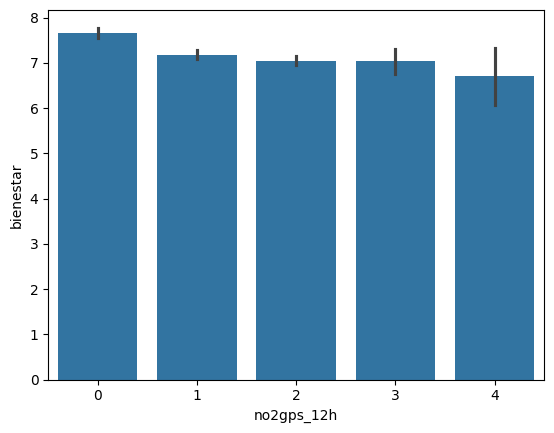

In [14]:
sns.barplot(x=cut_into_bins(numerical_df["no2gps_12h"],5),y=numerical_df["bienestar"])

<h1>This cell melts correlation into a tidy format where index column is the row variable and col column is the column variable aand val column is the numerical correlation value</h1>

In [15]:
numerical_df=numerical_df.drop("ID_Zenodo",axis=1)
correlation=numerical_df.corr()
correlation=correlation.reset_index()
correlation_melted=correlation.melt(id_vars="index",var_name="col",value_name="val")


In [16]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3188 entries, 3 to 3310
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_all              1594 non-null   float64
 1   year                  1594 non-null   float64
 2   day                   1594 non-null   float64
 3   occurrence_mental     1594 non-null   float64
 4   bienestar             1594 non-null   float64
 5   energia               1594 non-null   float64
 6   estres                1594 non-null   float64
 7   sueno                 1594 non-null   float64
 8   horasfuera            1594 non-null   float64
 9   occurrence_stroop     1594 non-null   float64
 10  mean_incongruent      1594 non-null   float64
 11  correct               1594 non-null   float64
 12  response_duration_ms  1594 non-null   float64
 13  performance           1594 non-null   float64
 14  mean_congruent        1594 non-null   float64
 15  inhib_control         1594

In [17]:
correlation_melted.head()

,index,col,val
0,date_all,date_all,1.000000
1,year,date_all,0.665819
2,day,date_all,0.031729
3,occurrence_mental,date_all,0.220259
4,bienestar,date_all,0.057162


<h1>This cell ensures that there is no repeatation of stating correlation between a unique pair of columns</h1>
<h1>These pairs have also been sorted on the basis of their correlation values, this providess a comfortable view of pairs with high correlation values</h1>

In [18]:
s=set()
columns=list(numerical_df.columns)
for i in range(len(columns)):
    c1=columns[i]
    for j in range(i+1,len(columns)):
        
        s.add(c1+columns[j])

#correlation_melted=correlation_melted[(correlation_melted["index"]+correlation_melted["col"]) in s]
correlation_melted=correlation_melted[(correlation_melted["index"]+correlation_melted["col"]).isin(s)]
correlation_melted=correlation_melted.sort_values(by="val",ascending=False,key=abs)

In [19]:
to_print=correlation_melted.head(200)

for index in range(len(to_print)):
    row=to_print.iloc[index]
    print(row["index"],row["col"],row["val"])

min_gps hour_gps 1.0000000000000009
sec_noise55_day hours_noise_55_day 1.0000000000000007
age_yrs yearbirth -1.0000000000000002
year start_year 1.0
no2gps_12h_x30 no2gps_24h_x30 1.0
mean_incongruent response_duration_ms 1.0
sec_noise65_day hours_noise_65_day 0.9999999999999994
sec_greenblue_day hours_greenblue_day 0.9999999999999994
no2bcn_24h no2bcn_24h_x30 0.9999999999999991
no2gps_24h no2gps_24h_x30 0.9999999999999961
no2gps_24h no2gps_12h_x30 0.9999999999999961
no2bcn_12h no2bcn_12h_x30 0.9999999999999954
pressure_24h pressure_12h 0.9864351979018311
occurrence_mental occurrence_stroop 0.9784493073750425
tmean_24h tmean_12h 0.9625947334290155
precip_12h maxwindspeed_12h 0.9521364839688422
performance z_performance 0.9479732159653254
inhib_control z_inhib_control 0.9460809989137213
humi_24h humi_12h 0.9333606317453959
z_performance z_mean_incongruent -0.9282973095182534
mean_incongruent z_mean_incongruent 0.9084945953696532
response_duration_ms z_mean_incongruent 0.9084945953696532
m

In [20]:
columns=list(numerical_df.columns)
#numerical_df.drop(columns=["energia","estres","sueno"],inplace=True)

In [21]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3188 entries, 3 to 3310
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_all              1594 non-null   float64
 1   year                  1594 non-null   float64
 2   day                   1594 non-null   float64
 3   occurrence_mental     1594 non-null   float64
 4   bienestar             1594 non-null   float64
 5   energia               1594 non-null   float64
 6   estres                1594 non-null   float64
 7   sueno                 1594 non-null   float64
 8   horasfuera            1594 non-null   float64
 9   occurrence_stroop     1594 non-null   float64
 10  mean_incongruent      1594 non-null   float64
 11  correct               1594 non-null   float64
 12  response_duration_ms  1594 non-null   float64
 13  performance           1594 non-null   float64
 14  mean_congruent        1594 non-null   float64
 15  inhib_control         1594

<h1>sueno means sleep,estres means stress, energia means energy,bienestar means well being </h1>
<h1>All of these have been rated by the respondent on a scale of 1 to 10</h1>

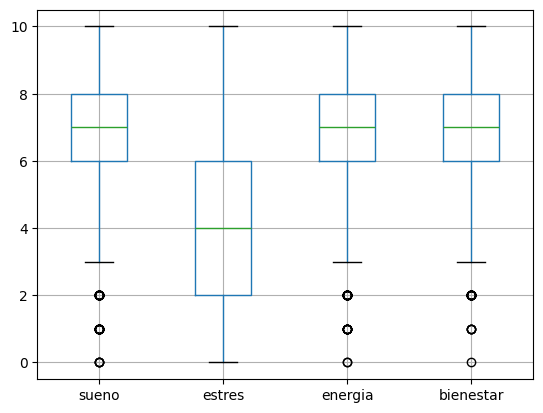

In [22]:
numerical_df=numerical_df.dropna()
columns=["sueno","estres","energia","bienestar"]
numerical_df.boxplot(column=columns)
numerical_df=remove_outliers_iqr(numerical_df,columns)


<h1>Standard Scaling columns for model use for regression , classification or clustering</h1>
<h1>In retrospect, i should have used a Pipeline here but i didnt know about it at the time of making this notebook</h1>

In [23]:
scaler=StandardScaler()


#clustering_df=.drop("bienestar",axis=1)
#scaler_target=StandardScaler()
"""
numerical_df["bienestar"]=cut_into_bins(numerical_df["bienestar"],3)
numerical_df["energia"]=cut_into_bins(numerical_df["energia"],3)
numerical_df["estres"]=cut_into_bins(numerical_df["estres"],3)
numerical_df["sueno"]=cut_into_bins(numerical_df["sueno"],3)
"""
scaler1=StandardScaler()
scaler_bienestar=StandardScaler()
#energia
scaler_energia=StandardScaler()
#estres
scaler_estres=StandardScaler()
#sueno
scaler_sueno=StandardScaler()
#Scaled=pd.DataFrame(scaler.fit_transform(clustering_df.drop("bienestar",axis=1)),columns=clustering_df.drop("bienestar",axis=1).columns,index=clustering_df.index)
#Scaled=pd.concat([Scaled,pd.DataFrame(scaler_target.fit_transform(clustering_df[["bienestar"]]),columns=["bienestar"])],axis=1)
#X_scaled["bienestar"]=X_scaled["bienestar"]*10
Scaled_x=numerical_df.drop(["bienestar","energia","estres","sueno"],axis=1)
Scaled_x=pd.DataFrame(scaler1.fit_transform(Scaled_x),columns=Scaled_x.columns)
Scaled_y_bienestar=pd.DataFrame(scaler_bienestar.fit_transform(numerical_df[["bienestar"]]),columns=["bienestar"])
Scaled_y_sueno=pd.DataFrame(scaler_sueno.fit_transform(numerical_df[["sueno"]]),columns=["sueno"])
Scaled_y_energia=pd.DataFrame(scaler_energia.fit_transform(numerical_df[["energia"]]),columns=["energia"])
Scaled_y_estres=pd.DataFrame(scaler_estres.fit_transform(numerical_df[["estres"]]),columns=["estres"])
Scaled=pd.concat([Scaled_x,Scaled_y_bienestar,
                 Scaled_y_sueno,Scaled_y_energia,Scaled_y_estres],axis=1)

<h1>A silhouette score measures how well each point fits within its assigned cluster compared to other clusters.</h1>
<h1>I am measuring silhouette scores for different number of clusters so as to find the perfect number of clusters</h1>

In [24]:
silhouette_scores = []
k_values = range(2, 11) # Start from 2, as a silhouette score is not defined for k=1

for k in k_values:
    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(Scaled)

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(Scaled, labels)
    silhouette_scores.append(score)

    print(f"For k={k}, the silhouette score is: {score:.4f}")

For k=2, the silhouette score is: 0.1119
For k=3, the silhouette score is: 0.1157
For k=4, the silhouette score is: 0.1133
For k=5, the silhouette score is: 0.1114
For k=6, the silhouette score is: 0.1054
For k=7, the silhouette score is: 0.1115
For k=8, the silhouette score is: 0.0933
For k=9, the silhouette score is: 0.0957
For k=10, the silhouette score is: 0.0894


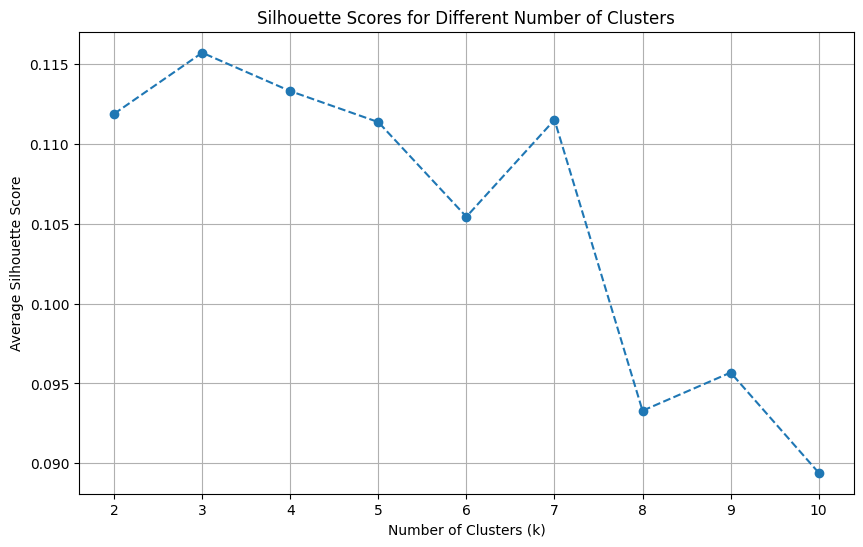


 The optimal number of clusters (k) is approximately: 3


In [25]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal k value
optimal_k_index = np.argmax(silhouette_scores)
optimal_k = k_values[optimal_k_index]

print(f"\n The optimal number of clusters (k) is approximately: {optimal_k}")

<h1>saving scaled columns estres,energia,sueno,bienestar</h1>

In [26]:


Scaled_clean = Scaled.copy()
estres=Scaled_clean[["estres"]]
energia=Scaled_clean[["energia"]]
sueno=Scaled_clean[["sueno"]]
bienestar=Scaled_clean[["bienestar"]]


<h1>Performing Principal Component Analysis to reduce noise and decided minimum number of new generated features such that 95 percent of variance observed in dataset can be explained, the rest 5 percent are probably noise</h1>

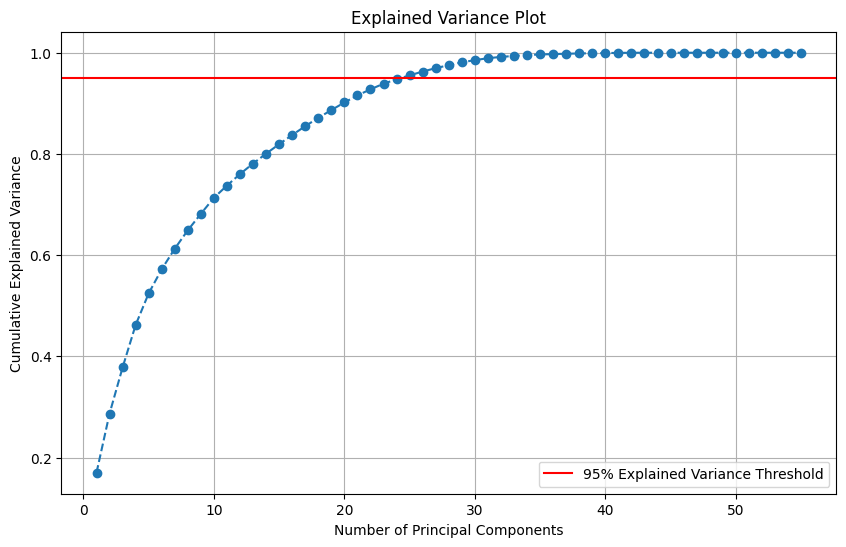

In [27]:
pca = PCA()
pca.fit(Scaled_clean)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Step 5: Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance Threshold')
plt.legend(loc='lower right')
plt.show()

<h1>Dropping bienestar , energia , estres and sueno from the scaled dataset just for further analysis of result with respect to the remaining colummns , because bienestar is our goal prediction feature and it is already known that energia , estres and sueno have high correlation with it</h1>

In [28]:
Scaled_clean.drop(["bienestar","energia","estres","sueno"],axis=1,inplace=True)

<h1>Divide Scaled_clean and bienestarr into train and test datasets</h1>

In [29]:
X=Scaled_clean
Y=pd.DataFrame(bienestar,columns=["bienestar"])

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    random_state=42
)

<h1>Linear regression model built for predicting bienestar from Scaled_clean</h1>

In [30]:
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


<h1>Linear regression model evaluation statistics- mean absolute error and r2 score</h1>

In [31]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.8015
R-squared (R2): -0.0360


<h1>Linear regression model evaluation statistics- mean squared error and root mean squared error</h1>

In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 1.07
Root Mean Squared Error: 1.03


<h1>XGBoost regression model built for predicting bienestar from Scaled_clean</h1>

In [33]:

# Initialize the XGBoost Regressor model
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)


# Train the model on the training data
xgb_regressor.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None
,feature_types,None


<h1>XGBoost regression model evaluation statistics- mean absolute error and r2 score</h1>

In [34]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.8015
R-squared (R2): -0.0360


<h1>XGBoost regression model evaluation statistics- mean squared error and root mean squared error</h1>

In [35]:


# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 0.81
Root Mean Squared Error: 0.90


### `f(column_to_predict)` 

This function trains an XGBoost model to predict one target variable (`estres`, `sueno`, `energia`, or `bienestar`) from the feature matrix `X` where I split column_to_predict into two categorical bins , I will now turn to xgboost classification instead of regression to see if it yields better results, in regression we have only tested for bienestar and i will use that as a standard for comparision

**Steps:**
1. **Build Y:** Extract the chosen column and bin it into two classes (0/1).
2. **Split Data:** Create train/test sets with stratified sampling.
3. **Oversample:** Balance the training data using custom `oversampling()` to fix class imbalance.
4. **Train Model:** Fit an XGBoost classifier on the resampled data.
5. **Balanced Evaluation:** Create a balanced subset of the test set for fair metrics.
6. **Metrics:** Compute AUC-PR, Average Precision, Accuracy, and show the classification report.
7. **Confusion Matrix:** Visualize model performance.
8. **Return Model:** The trained classifier is returned.

The function ensures numeric targets, balanced training, and fair evaluation.



In [50]:
def f(column_to_predict):
    global estres, sueno, energia, bienestar, X

    to_predict = {
        "estres": estres,
        "sueno": sueno,
        "energia": energia,
        "bienestar": bienestar
    }

    Y = pd.DataFrame(to_predict[column_to_predict], columns=[column_to_predict])

    Y[column_to_predict] = cut_into_bins(
        Y[column_to_predict],
        2,
        bin_vertices=[
            Y[column_to_predict].min(),
            Y[column_to_predict].quantile(0.5),
            Y[column_to_predict].max()
        ]
    ).astype(int)

    X_clean = X.copy()

    X_train, X_test, y_train, y_test = train_test_split(
        X_clean,
        Y,
        test_size=0.2,
        random_state=42,
        stratify=Y
    )

    X_train_resampled, y_train_resampled = oversampling(
        X_train,
        y_train,
        num_bins=2,
        weights=[1, 1]
    )

    class_column = column_to_predict
    y_train_resampled[class_column] = y_train_resampled[class_column].astype(int)

    model = xgb.XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=8,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        eval_metric="logloss",
        use_label_encoder=False
    )

    model.fit(X_train_resampled, y_train_resampled[class_column])

    test_df = pd.concat([X_test, y_test], axis=1)

    n1 = len(test_df[test_df[column_to_predict] == 1])
    n0 = len(test_df[test_df[column_to_predict] == 0])
    min_len = min(n1, n0)

    df1 = test_df[test_df[column_to_predict] == 1]
    df0 = test_df[test_df[column_to_predict] == 0].sample(
        n=min_len, random_state=42
    )

    test_balanced = pd.concat([df1, df0]).sample(frac=1, random_state=42)

    X_sample = test_balanced.drop(columns=[column_to_predict])
    Y_sample = test_balanced[column_to_predict].astype(int)

    y_pred = model.predict(X_sample)
    y_scores = model.predict_proba(X_sample)[:, 1]

    precision, recall, _ = precision_recall_curve(Y_sample, y_scores)
    auc_pr = auc(recall, precision)
    ap_score = average_precision_score(Y_sample, y_scores)

    print("AUC-PR:", auc_pr)
    print("Average Precision (AP):", ap_score)
    print("Accuracy:", accuracy_score(Y_sample, y_pred))
    print("\nClassification Report:\n", classification_report(Y_sample, y_pred))

    cm = confusion_matrix(Y_sample, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues", values_format='d')
    plt.show()

    return model


[np.float64(-2.3716992155418026), np.float64(-0.353603681228738), np.float64(1.6644918530843262)] duhifuhiufheufhu


C:\Users\shash\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


AUC-PR: 0.6781097318256459
Average Precision (AP): 0.679853565381415
Accuracy: 0.5978260869565217

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.83      0.67       138
           1       0.68      0.37      0.48       138

    accuracy                           0.60       276
   macro avg       0.62      0.60      0.58       276
weighted avg       0.62      0.60      0.58       276



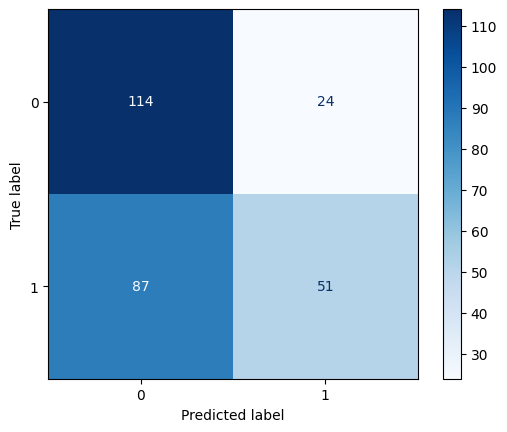

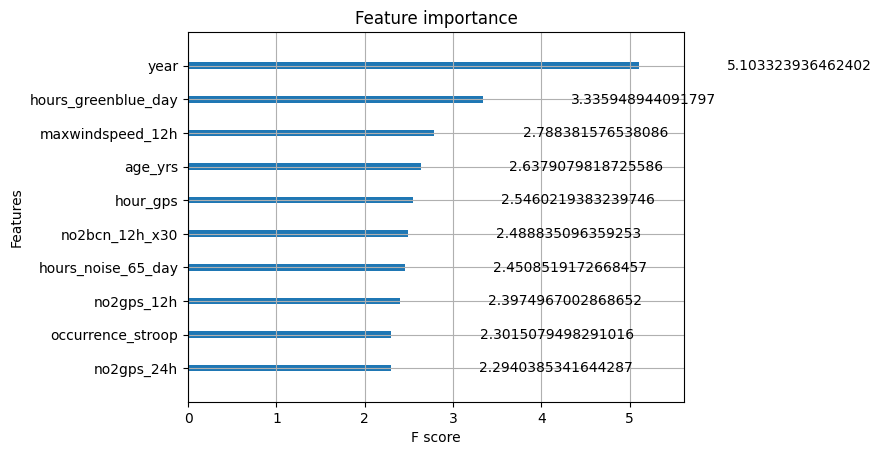

In [62]:
model1=f("sueno")
xgb.plot_importance(model1, max_num_features=10,importance_type='gain')
plt.show()

[np.float64(-1.6494614131029), np.float64(0.3663679152373156), np.float64(2.3821972435775316)] duhifuhiufheufhu


C:\Users\shash\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


AUC-PR: 0.6992142875749623
Average Precision (AP): 0.7018149472318018
Accuracy: 0.6567164179104478

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.81      0.70       134
           1       0.72      0.51      0.60       134

    accuracy                           0.66       268
   macro avg       0.67      0.66      0.65       268
weighted avg       0.67      0.66      0.65       268



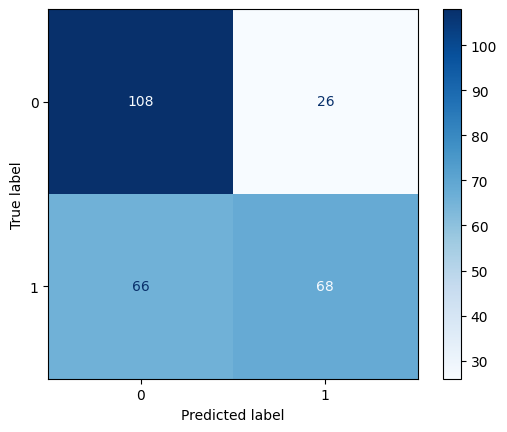

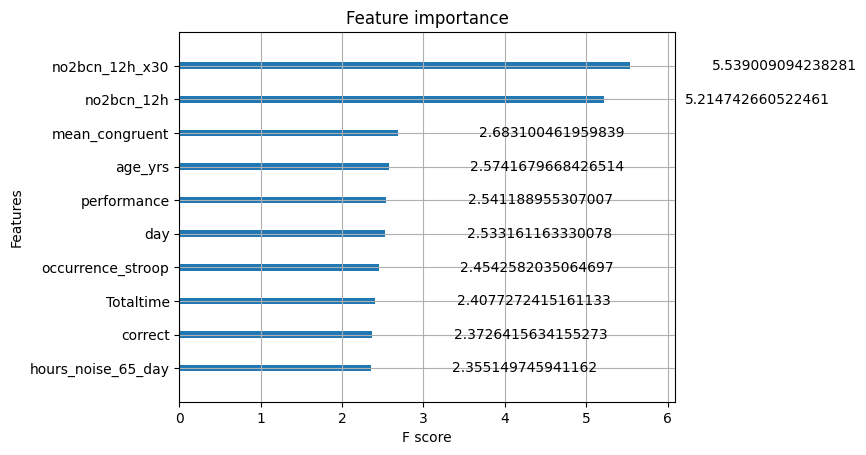

In [63]:
model2=f("estres")
xgb.plot_importance(model2,max_num_features=10, importance_type='gain')
plt.show()

[np.float64(-2.646131598874094), np.float64(-0.4140422676786777), np.float64(1.8180470635167387)] duhifuhiufheufhu


C:\Users\shash\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


AUC-PR: 0.6421387032095862
Average Precision (AP): 0.6448114426043166
Accuracy: 0.5942028985507246

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.79      0.66       138
           1       0.65      0.40      0.50       138

    accuracy                           0.59       276
   macro avg       0.61      0.59      0.58       276
weighted avg       0.61      0.59      0.58       276



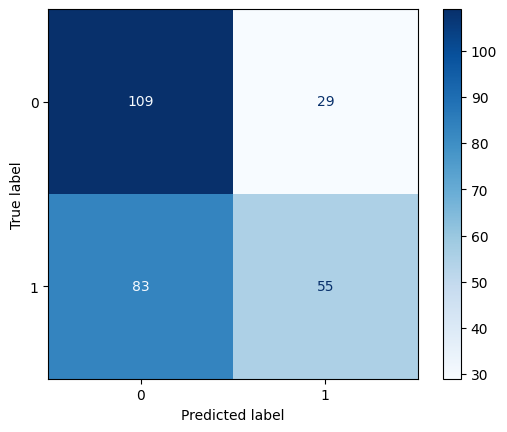

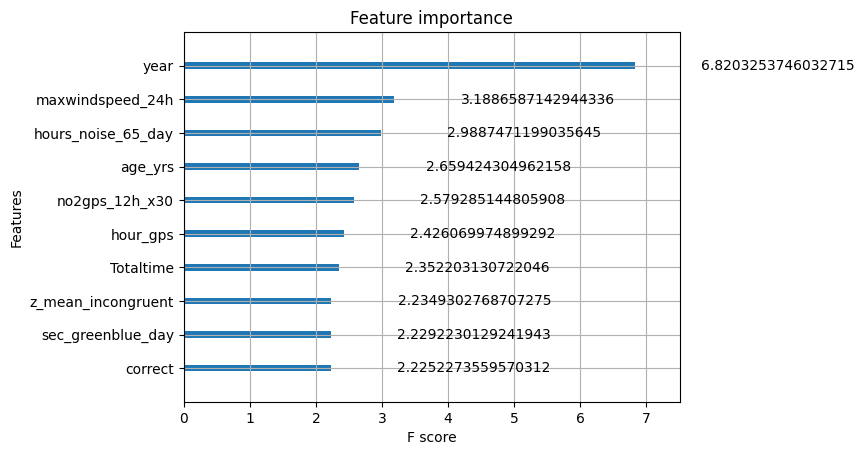

In [64]:

model3=f("energia")
xgb.plot_importance(model3,max_num_features=10, importance_type='gain')

plt.show()

[np.float64(-2.921089808374814), np.float64(-0.5934779005487738), np.float64(1.7341340072772669)] duhifuhiufheufhu


C:\Users\shash\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


AUC-PR: 0.6872235343337865
Average Precision (AP): 0.6905479348578646
Accuracy: 0.6071428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.89      0.69        70
           1       0.74      0.33      0.46        70

    accuracy                           0.61       140
   macro avg       0.66      0.61      0.57       140
weighted avg       0.66      0.61      0.57       140



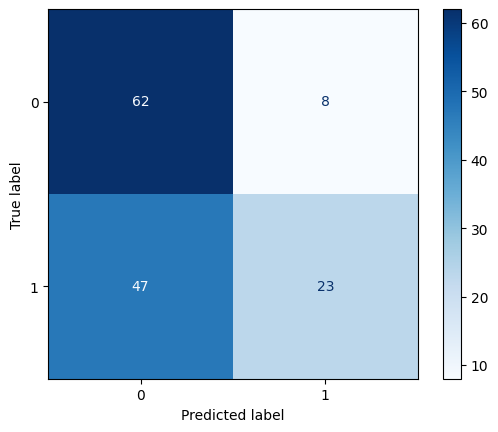

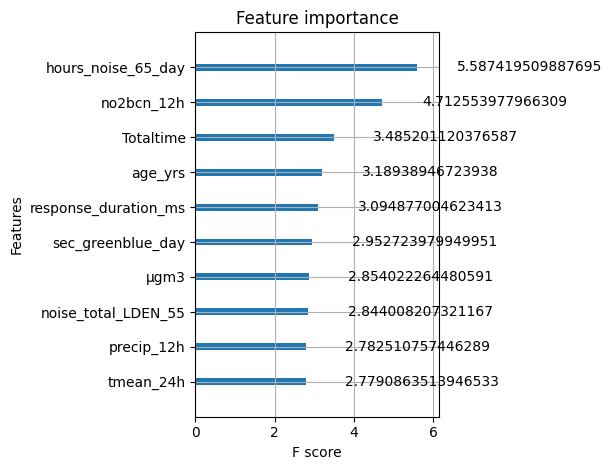

In [65]:
model4=f("bienestar")
xgb.plot_importance(model4,max_num_features=10, importance_type='gain')
plt.tight_layout()
plt.show()

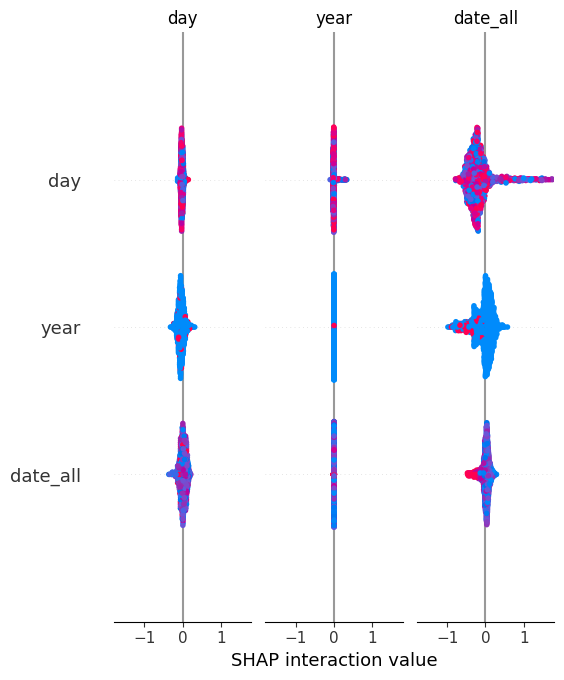

In [41]:
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(X_train)


shap.summary_plot(shap_values, X_train)

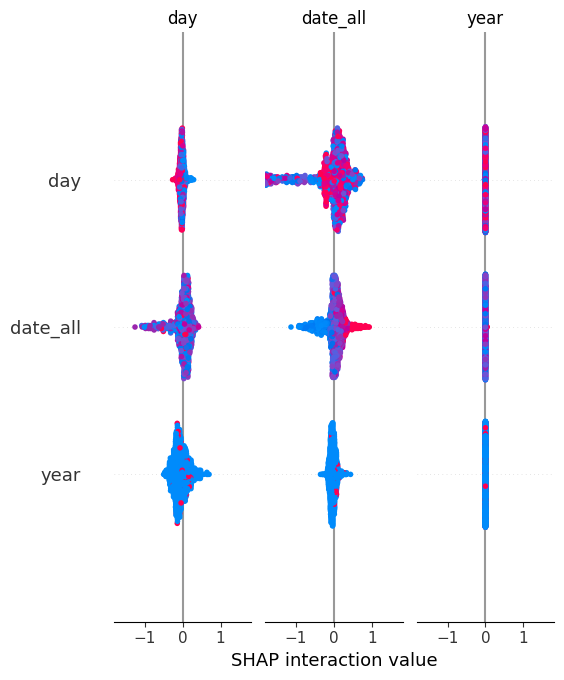

In [42]:
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_train)


shap.summary_plot(shap_values, X_train)

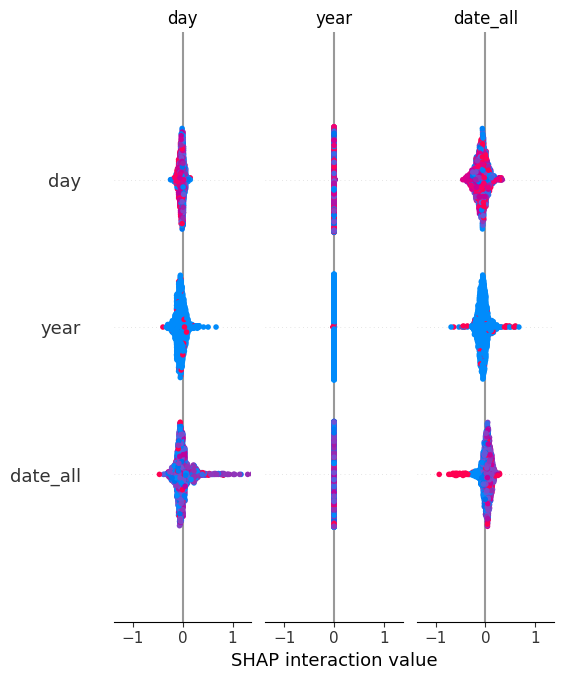

In [43]:
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(X_train)


shap.summary_plot(shap_values, X_train)

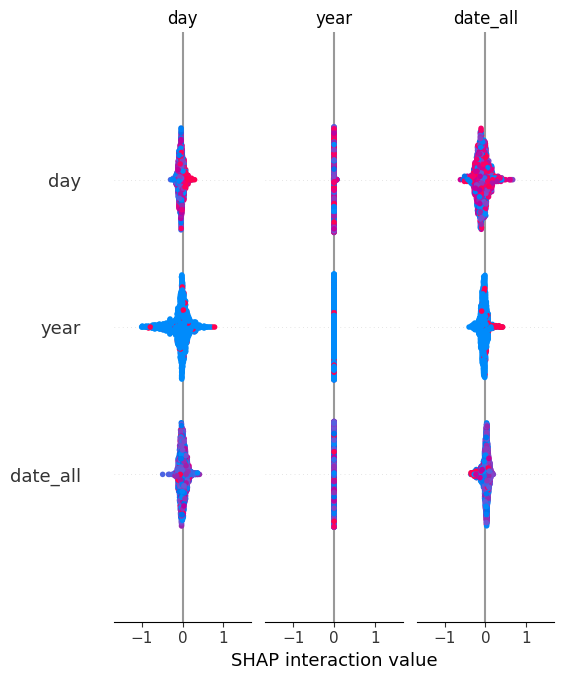

In [44]:
explainer = shap.TreeExplainer(model4)
shap_values = explainer.shap_values(X_train)


shap.summary_plot(shap_values, X_train)